# Wrangle and Analyse WeRateDogs Twitter Data

#### Udacity alx Data Analyst Nanodegree
#### Salami Suleiman, September 2022

## Introduction

This project invetigates the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

The data contains each tweet's retweet count and favorite ("like") count collected from the Twitter API. The data also contains dog image predictions generated from the neural network.

For our analysis, the specific questions being investigated here are:

* What is the distribution of tweets overtime?
* What is the most popular dog name?
* How are retweets and favorites couts related?

In [1]:
# load required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
## load dataset

df_master = pd.read_csv('twitter_archive_master.csv') 

In [5]:
list(df_master.columns)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweets_count',
 'favorite_count']

In [4]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1583 non-null   int64  
 1   timestamp           1583 non-null   object 
 2   text                1583 non-null   object 
 3   rating_numerator    1583 non-null   float64
 4   rating_denominator  1583 non-null   float64
 5   name                1583 non-null   object 
 6   dog_stage           1583 non-null   object 
 7   jpg_url             1583 non-null   object 
 8   img_num             1583 non-null   float64
 9   p1                  1583 non-null   object 
 10  p1_conf             1583 non-null   float64
 11  p1_dog              1583 non-null   bool   
 12  p2                  1583 non-null   object 
 13  p2_conf             1583 non-null   float64
 14  p2_dog              1583 non-null   bool   
 15  p3                  1583 non-null   object 
 16  p3_con

In [3]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweets_count,favorite_count
count,1.583000e+03,1583.000000,1583.000000,1583.000000,1583.000000,1.583000e+03,1.583000e+03,1583.000000,1583.000000
mean,7.446632e+17,11.984075,10.120025,1.216677,0.603551,1.337078e-01,5.960947e-02,2801.403664,9508.711939
std,6.841215e+16,44.683597,4.150396,0.585691,0.273676,1.018113e-01,5.145330e-02,4071.597886,11917.426789
min,6.660519e+17,1.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,23.000000,107.000000
25%,6.805966e+17,10.000000,10.000000,1.000000,0.369509,4.977860e-02,1.519165e-02,735.000000,2417.000000
50%,7.271754e+17,11.000000,10.000000,1.000000,0.605851,1.159840e-01,4.859160e-02,1595.000000,4995.000000
75%,8.011151e+17,12.000000,10.000000,1.000000,0.864201,1.978790e-01,9.203645e-02,3369.000000,12261.500000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,56625.000000,107956.000000


#### What is the distribution of tweets overtime?

In [346]:
# re-format timestamp

df_master.timestamp = pd.to_datetime(df_master['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

# group by month
tweets_by_month = df_master.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()[['timestamp', 'tweet_id']]
tweets_by_month.head()


,timestamp,tweet_id
0,2015-11-30 00:00:00+00:00,167
1,2015-12-31 00:00:00+00:00,265
2,2016-01-31 00:00:00+00:00,131
3,2016-02-29 00:00:00+00:00,85
4,2016-03-31 00:00:00+00:00,91


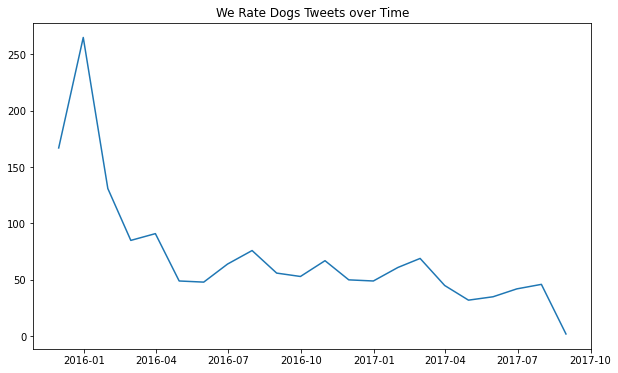

In [347]:
plt.subplots(figsize=(10, 6))

plt.plot(tweets_by_month.timestamp, tweets_by_month.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

* Although WeRateDogs is very popular, we noticed that for the given data, it peaked in December 2015
* The number of tweets has since fallen until 2017 where our data ends

#### What is the most popular dog name?

In [348]:

df_dog_name = df_master.groupby("name")["name"].count().sort_values(ascending=False)[0:10]

df_dog_name

name
Cooper     13
Oliver     12
Charlie    12
Lucy       11
Nonehe      9
Penny       9
Winston     9
Tucker      9
Bo          8
Sadie       8
Name: name, dtype: int64

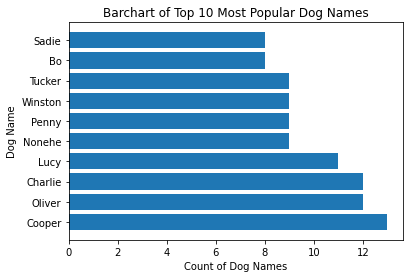

In [349]:
plt.barh(df_dog_name.index, df_dog_name)
plt.title('Barchart of Top 10 Most Popular Dog Names')
plt.xlabel('Count of Dog Names')
plt.ylabel('Dog Name');


* The Top 10 Dog names are generally as expected
* 70% of the our top 10 dog names appear on 'dogtime.com' top 100 most popular dog names

####   How are retweets and favorites couts related?

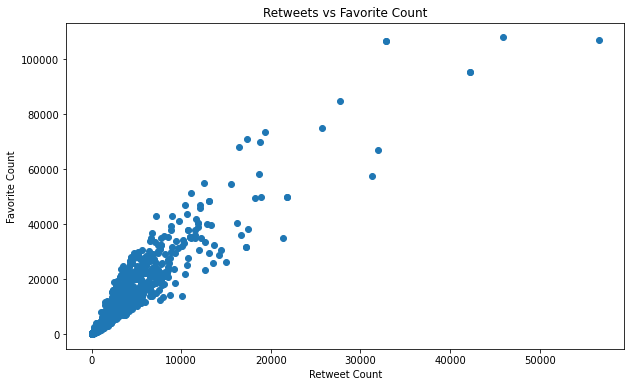

In [350]:
# scatter plot of profit vs vote average

plt.figure(figsize = (10, 6))

plt.scatter(df_master['retweets_count'], df_master['favorite_count'])
plt.title('Retweets vs Favorite Count')
plt.xlabel("Retweet Count")
plt.ylabel('Favorite Count');

* The plot shows there is positive correlation betwen retweets and favorite counts
* This implies favorited tweets are most likely to get more retweets and even more favorites